In [1]:
import matplotlib as mpl
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.pyplot import figure


## Rading and Modifying data files

In [2]:
# .set_option() changes behavior globaly in Jupyter Notebooks, so it is not a temporary fix.

pd.set_option('display.float_format', lambda x: '%.2f' % x)

#Or to almost completely suppress scientific notation without losing precision, try this:
#pd.set_option('display.float_format', str)

#### Cab_Data

In [3]:
Cab_Data=  pd.read_csv(r"https://raw.githubusercontent.com/DataGlacier/DataSets/main/Cab_Data.csv")

### Creating profit coloumn

In [4]:
Cab_Data['Profit']=(Cab_Data['Price Charged']-Cab_Data['Cost of Trip'])*Cab_Data['KM Travelled']

In [5]:
Cab_Data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.63,1745.24
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.85,677.32
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.63,249.21
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.60,855.72
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.78,147.05
...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.36,28.22
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.85,57.98
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.65,2425.91
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.05,282.85


In [6]:
Cab_Data.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Profit
count,359392.00,359392.00,359392.00,359392.00,359392.00,359392.00
mean,10220761.19,42964.07,22.57,423.44,286.19,4005.00
std,126805.80,307.47,12.23,274.38,157.99,5972.67
min,10000011.00,42371.00,1.90,15.60,19.00,-9858.69
25%,10110809.75,42697.00,12.00,206.44,151.20,306.89
50%,10221035.50,42988.00,22.44,386.36,282.48,1656.52
75%,10330937.25,43232.00,32.96,583.66,413.68,5204.29
max,10440107.00,43465.00,48.00,2048.03,691.20,68513.61


#### City_Data

In [7]:
city_Data=  pd.read_csv(r"https://raw.githubusercontent.com/DataGlacier/DataSets/main/City.csv")

In [8]:
type(city_Data.loc[2,'Population'])

str

In [9]:
city_Data = city_Data.applymap(lambda x: x.replace(',', ''))
city_Data['Population'] = pd.to_numeric(city_Data['Population'])
city_Data['Users'] = pd.to_numeric(city_Data['Users'])

In [10]:
# Sanfransico has no data in other data sets, we remove

delindex=city_Data[city_Data['City']=='SAN FRANCISCO CA'].index

city_Data.drop(delindex, inplace=True)
city_Data

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247
5,ORANGE COUNTY,1030185,12994
6,SAN DIEGO CA,959307,69995
7,PHOENIX AZ,943999,6133
8,DALLAS TX,942908,22157
9,ATLANTA GA,814885,24701


#### Customer_ID

In [11]:

Customer_ID=  pd.read_csv(r"https://raw.githubusercontent.com/DataGlacier/DataSets/main/Customer_ID.csv")

In [12]:
Customer_ID.columns

Index(['Customer ID', 'Gender', 'Age', 'Income (USD/Month)'], dtype='object')

In [13]:
Customer_ID.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.00,49171.00,49171.00
mean,28398.25,35.36,15015.63
std,17714.14,12.60,8002.21
min,1.00,18.00,2000.00
25%,12654.50,25.00,8289.50
50%,27631.00,33.00,14656.00
75%,43284.50,42.00,21035.00
max,60000.00,65.00,35000.00


In [14]:
Customer_ID

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


#### Transaction_ID

In [15]:
Transaction_ID=  pd.read_csv(r"https://raw.githubusercontent.com/DataGlacier/DataSets/main/Transaction_ID.csv")

In [16]:
Transaction_ID

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


# Joining tables

In [17]:
trc= Transaction_ID.join(Cab_Data.set_index('Transaction ID'), on='Transaction ID')


In [18]:
tcc= trc.join(Customer_ID.set_index('Customer ID'), on='Customer ID')


#### Converting date

In [19]:
tcc['Date'] = pd.to_datetime(tcc['Date of Travel'], origin=pd.Timestamp('1900-01-01'), unit='d')

In [20]:
tcc

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Gender,Age,Income (USD/Month),Date
0,10000011,29290,Card,42377.00,Pink Cab,ATLANTA GA,30.45,370.95,313.63,1745.24,Male,28,10813,2016-01-10
1,10000012,27703,Card,42375.00,Pink Cab,ATLANTA GA,28.62,358.52,334.85,677.32,Male,27,9237,2016-01-08
2,10000013,28712,Cash,42371.00,Pink Cab,ATLANTA GA,9.04,125.20,97.63,249.21,Male,53,11242,2016-01-04
3,10000014,28020,Cash,42376.00,Pink Cab,ATLANTA GA,33.17,377.40,351.60,855.72,Male,23,23327,2016-01-09
4,10000015,27182,Card,42372.00,Pink Cab,ATLANTA GA,8.73,114.62,97.78,147.05,Male,33,8536,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440093,10440104,53286,Cash,43104.00,Yellow Cab,WASHINGTON DC,8.40,113.75,106.85,57.98,Male,32,6528,2018-01-06
440094,10440105,52265,Cash,43105.00,Yellow Cab,WASHINGTON DC,27.75,437.07,349.65,2425.91,Male,56,7966,2018-01-07
440095,10440106,52175,Card,43105.00,Yellow Cab,WASHINGTON DC,8.80,146.19,114.05,282.85,Male,32,6423,2018-01-07
440096,10440107,52917,Card,43102.00,Yellow Cab,WASHINGTON DC,12.76,191.58,177.62,178.14,Male,20,11284,2018-01-04


#### Separating data of Pink and Yellow

In [21]:
pink = tcc[tcc['Company'] == 'Pink Cab']
yellow = tcc[tcc['Company'] == 'Yellow Cab']

In [22]:
pink

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Gender,Age,Income (USD/Month),Date
0,10000011,29290,Card,42377.00,Pink Cab,ATLANTA GA,30.45,370.95,313.63,1745.24,Male,28,10813,2016-01-10
1,10000012,27703,Card,42375.00,Pink Cab,ATLANTA GA,28.62,358.52,334.85,677.32,Male,27,9237,2016-01-08
2,10000013,28712,Cash,42371.00,Pink Cab,ATLANTA GA,9.04,125.20,97.63,249.21,Male,53,11242,2016-01-04
3,10000014,28020,Cash,42376.00,Pink Cab,ATLANTA GA,33.17,377.40,351.60,855.72,Male,23,23327,2016-01-09
4,10000015,27182,Card,42372.00,Pink Cab,ATLANTA GA,8.73,114.62,97.78,147.05,Male,33,8536,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437599,10437610,51142,Card,43106.00,Pink Cab,WASHINGTON DC,13.56,184.19,135.60,658.88,Female,40,3122,2018-01-08
437600,10437611,52754,Card,43465.00,Pink Cab,WASHINGTON DC,29.68,388.08,302.74,2533.01,Female,29,19676,2019-01-02
437601,10437612,53039,Card,43107.00,Pink Cab,WASHINGTON DC,28.50,369.04,310.65,1664.12,Male,37,22765,2018-01-09
437603,10437614,51766,Cash,43102.00,Pink Cab,WASHINGTON DC,16.10,194.17,162.61,508.12,Male,18,12364,2018-01-04


### Aggregation of some varibles by indexing city

In [23]:
sumcity=pd.pivot_table(tcc,index='City',values=['Price Charged','Cost of Trip','KM Travelled', 'Profit'],aggfunc='sum').reset_index()

In [24]:
sumcity.columns=['City', 'Total Cost of Trip','KM Travelled','Total Price Charged', 'Profit']

In [25]:
sumcity

,City,Total Cost of Trip,KM Travelled,Total Price Charged,Profit
0,ATLANTA GA,2137808.84,168643.76,2980241.72,24420406.97
1,AUSTIN TX,1350441.47,109207.30,1877142.50,15237759.67
2,BOSTON MA,8591036.15,670388.18,10359755.42,51595764.25
3,CHICAGO IL,16454005.11,1281704.39,19841318.52,99454733.53
4,DALLAS TX,2013696.64,157782.05,3142429.91,33194328.34
5,DENVER CO,1064946.50,85869.75,1462531.51,11581140.38
6,LOS ANGELES CA,13383915.76,1088735.65,17795624.41,129119544.30
7,MIAMI FL,1821833.96,145418.17,2580135.20,22278140.28
8,NASHVILLE TN,809575.91,68324.74,959108.13,4419575.92
9,NEW YORK NY,28991506.51,2248809.74,56954061.67,814093444.97


#### Aggregation of some varibles of Pink company indexing city

In [26]:
sumcity_pink=pd.pivot_table(pink,index='City',values=['Price Charged','Cost of Trip','KM Travelled', 'Profit'],aggfunc='sum').reset_index()

In [27]:
sumcity_pink.columns=['City', 'Total Cost of Trip','KM Travelled','Total Price Charged', 'Profit']

In [28]:
sumcity_pink

,City,Total Cost of Trip,KM Travelled,Total Price Charged,Profit
0,ATLANTA GA,436305.72,39715.17,532355.80,2796012.11
1,AUSTIN TX,451127.42,41038.42,598572.71,4249029.21
2,BOSTON MA,1296658.32,117933.51,1558660.02,7668274.56
3,CHICAGO IL,2317463.65,210726.13,2636186.14,9347204.75
4,DALLAS TX,334105.29,30389.26,358835.40,690520.01
5,DENVER CO,344441.28,31308.15,385026.22,1170413.46
6,LOS ANGELES CA,4945493.70,449656.77,6071225.76,32929681.90
7,MIAMI FL,490363.44,44644.45,652664.63,4731364.99
8,NASHVILLE TN,454992.52,41474.17,519277.05,1888183.82
9,NEW YORK NY,3475779.97,315967.27,4987254.36,44239396.02


#### Aggregation of some varibles of Yellow company indexing city

In [29]:
sumcity_yellow=pd.pivot_table(yellow,index='City',values=['Price Charged','Cost of Trip','KM Travelled', 'Profit'],aggfunc='sum').reset_index()

In [30]:
sumcity_yellow.columns=['City', 'Total Cost of Trip','KM Travelled','Total Price Charged', 'Profit']

In [31]:
sumcity_yellow

,City,Total Cost of Trip,KM Travelled,Total Price Charged,Profit
0,ATLANTA GA,1701503.11,128928.59,2447885.92,21624394.87
1,AUSTIN TX,899314.05,68168.88,1278569.79,10988730.45
2,BOSTON MA,7294377.83,552454.67,8801095.40,43927489.69
3,CHICAGO IL,14136541.45,1070978.26,17205132.38,90107528.78
4,DALLAS TX,1679591.36,127392.79,2783594.51,32503808.33
5,DENVER CO,720505.22,54561.60,1077505.29,10410726.92
6,LOS ANGELES CA,8438422.07,639078.88,11724398.65,96189862.40
7,MIAMI FL,1331470.52,100773.72,1927470.57,17546775.29
8,NASHVILLE TN,354583.40,26850.57,439831.08,2531392.10
9,NEW YORK NY,25515726.54,1932842.47,51966807.31,769854048.94


## Testing Hypothesis

#### Profit across Cities

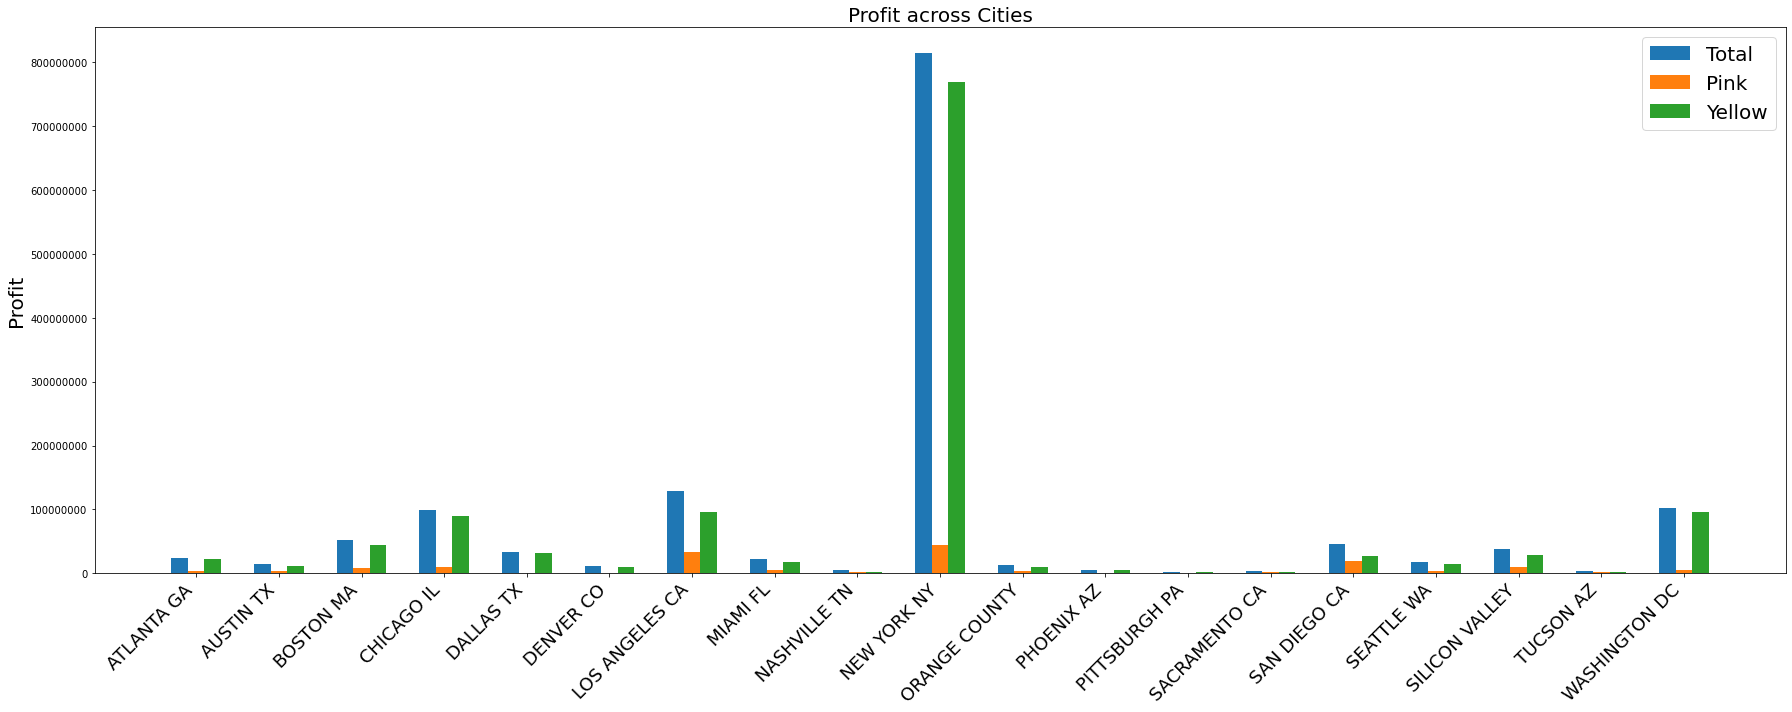

In [32]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

labels = sumcity['City']


x = np.arange(len(labels))  # the label locations
width = .2 # the width of the bars

fig, ax = plt.subplots(figsize=(25,10))
rects1 = ax.bar(x - width, sumcity['Profit'],width,  label='Total')
rects2 = ax.bar(x , sumcity_pink['Profit'],width, label='Pink')
rects3 = ax.bar(x + width, sumcity_yellow['Profit'],width, label='Yellow')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Profit', fontsize=20)
ax.set_title('Profit across Cities', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize=20)
ax.ticklabel_format(axis="y",useOffset=False,style='plain', useLocale=True)
plt.xticks( rotation=45,fontsize=18, ha="right")

    
fig.tight_layout()

plt.show()

## Hypothesis : Analyzing relationship between profit of cab industry and cities.
    
### As it is shown above, New York has a big and incomparable profit in cab industry that shows the importance of trade centers to enter as an investment in the cab industry for the future. Moreover, Yello company has a quite better result than pink to invest in.

#### Profit per City population


In [33]:
sumcity_pop=pd.merge(sumcity,city_Data,on='City',how='right')
sumcity_pop

,City,Total Cost of Trip,KM Travelled,Total Price Charged,Profit,Population,Users
0,NEW YORK NY,28991506.51,2248809.74,56954061.67,814093444.97,8405837,302149
1,CHICAGO IL,16454005.11,1281704.39,19841318.52,99454733.53,1955130,164468
2,LOS ANGELES CA,13383915.76,1088735.65,17795624.41,129119544.30,1595037,144132
3,MIAMI FL,1821833.96,145418.17,2580135.20,22278140.28,1339155,17675
4,SILICON VALLEY,2367396.88,193712.97,3684102.15,38655339.79,1177609,27247
5,ORANGE COUNTY,1097871.34,88826.69,1554873.21,13239018.19,1030185,12994
6,SAN DIEGO CA,5549217.12,460503.69,7136380.59,46382126.69,959307,69995
7,PHOENIX AZ,563741.76,45825.08,756682.64,5591694.59,943999,6133
8,DALLAS TX,2013696.64,157782.05,3142429.91,33194328.34,942908,22157
9,ATLANTA GA,2137808.84,168643.76,2980241.72,24420406.97,814885,24701


In [34]:
sumcity_pop['Profit per Population']= (sumcity_pop['Profit'] / sumcity_pop['Population'])

In [35]:
sumcity_pop['Profit per Population'].astype(float)
sumcity_pop['Profit per Population']=sumcity_pop['Profit per Population'].apply(lambda x: '%.5f' % x) 
sumcity_pop['Profit per Population'] = pd.to_numeric(sumcity_pop['Profit per Population'])

In [36]:
type(sumcity_pop.loc[1,'Profit per Population'])

numpy.float64

In [37]:
sumcity_pop.sort_values(by='Profit per Population',ascending=False)

,City,Total Cost of Trip,KM Travelled,Total Price Charged,Profit,Population,Users,Profit per Population
16,WASHINGTON DC,12873833.67,989037.66,16366703.83,102310123.93,418859,127001,244.26
18,BOSTON MA,8591036.15,670388.18,10359755.42,51595764.25,248968,80021,207.24
0,NEW YORK NY,28991506.51,2248809.74,56954061.67,814093444.97,8405837,302149,96.85
2,LOS ANGELES CA,13383915.76,1088735.65,17795624.41,129119544.30,1595037,144132,80.95
1,CHICAGO IL,16454005.11,1281704.39,19841318.52,99454733.53,1955130,164468,50.87
6,SAN DIEGO CA,5549217.12,460503.69,7136380.59,46382126.69,959307,69995,48.35
8,DALLAS TX,2013696.64,157782.05,3142429.91,33194328.34,942908,22157,35.20
4,SILICON VALLEY,2367396.88,193712.97,3684102.15,38655339.79,1177609,27247,32.83
9,ATLANTA GA,2137808.84,168643.76,2980241.72,24420406.97,814885,24701,29.97
12,SEATTLE WA,2249631.41,180903.99,2854316.26,17612472.34,671238,25063,26.24


In [38]:
pop_times_thousand = sumcity_pop['Population']/10000

#### Ploting Bar chart of Profit per City Population

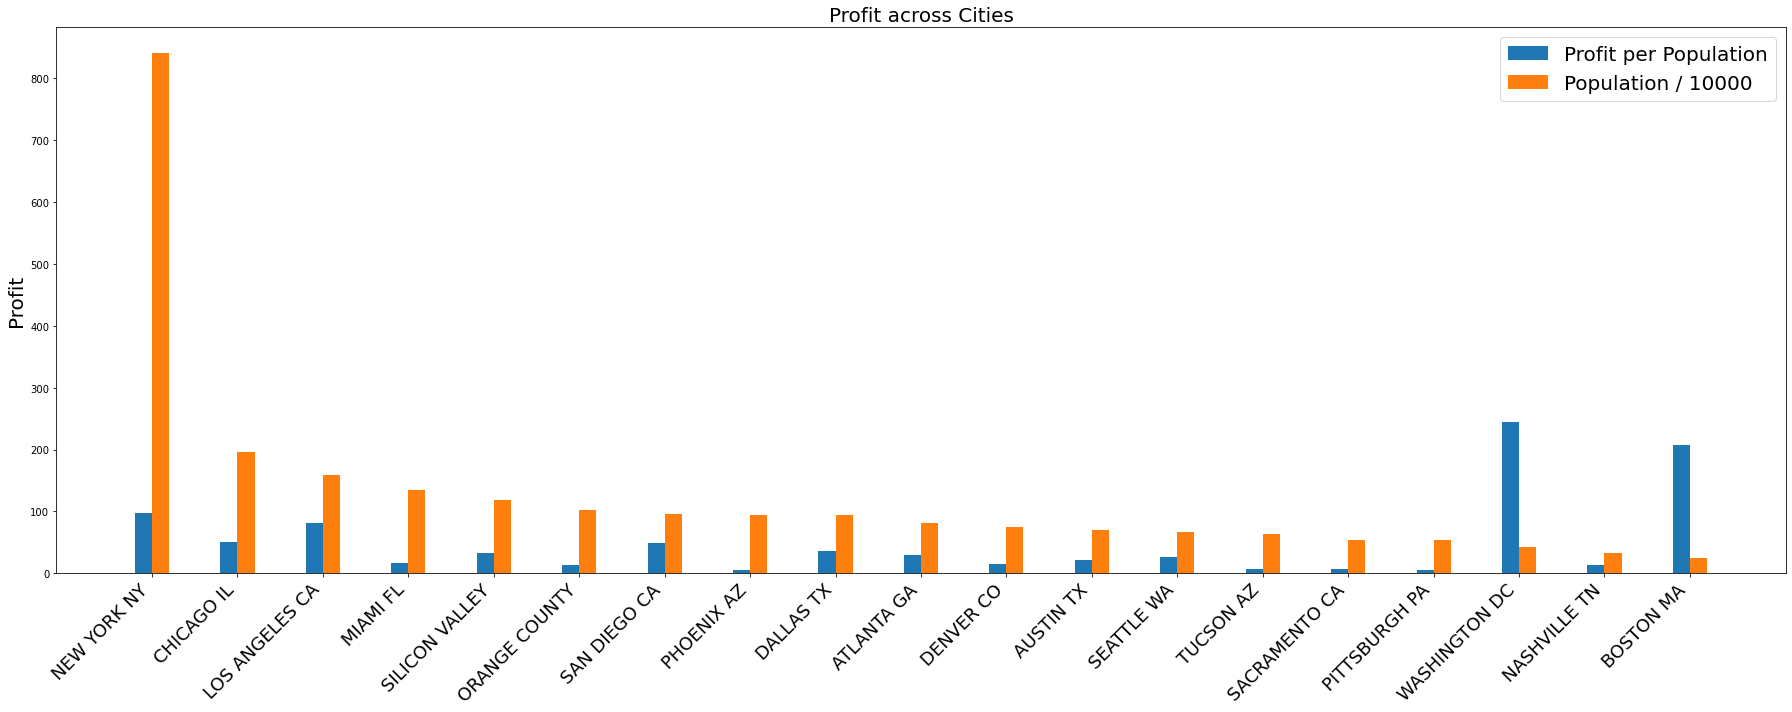

In [39]:

labels = sumcity_pop['City']


x = np.arange(len(labels))  # the label locations
width = .2 # the width of the bars

fig, ax = plt.subplots(figsize=(25,10))


rects1 = ax.bar(x - width/2, sumcity_pop['Profit per Population'],width,  label='Profit per Population')
#rects2 = ax.bar(x , sumcity_pink['Profit'],width, label='Pink')
rects3 = ax.bar(x + width/2, pop_times_thousand,width, label='Population / 10000')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Profit', fontsize=20)
ax.set_title('Profit across Cities', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize=20)
ax.ticklabel_format(axis="y",useOffset=False,style='plain', useLocale=True)
plt.xticks( rotation=45,fontsize=18, ha="right")

    
fig.tight_layout()

plt.show()

## Hypothesis : Analyzing relationship between profit of cab industry and cities.
    
### The figure above, Washington and Boston are better than other cities in terms of profit per population, but the important criteria is profit not profit per popoulation and there is no meaningful relationship between profit of cab industry and population of cities.

No handles with labels found to put in legend.
<ipython-input-56-9890f784974e>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, fontdict=None, minor=False, rotation=45)


[Text(0, 0, '10 < trips'),
 Text(1, 0, '2 < trips <5'),
 Text(2, 0, '4 < trips <10'),
 Text(3, 0, 'trips < 3 '),
 Text(4, 0, ''),
 Text(5, 0, ''),
 Text(6, 0, ''),
 Text(7, 0, ''),
 Text(8, 0, ''),
 Text(9, 0, ''),
 Text(10, 0, ''),
 Text(11, 0, ''),
 Text(12, 0, ''),
 Text(13, 0, ''),
 Text(14, 0, ''),
 Text(15, 0, ''),
 Text(16, 0, ''),
 Text(17, 0, ''),
 Text(18, 0, '')]

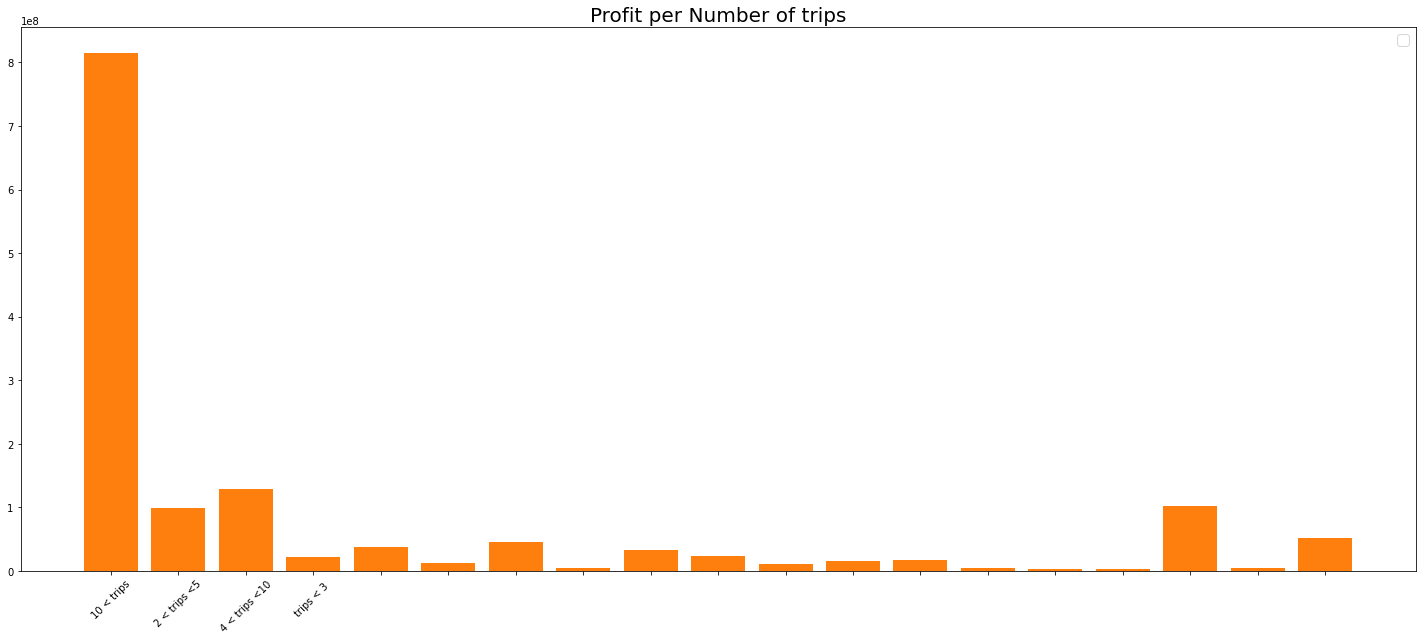

In [56]:


f, ax = plt.subplots(figsize=(25,10)) # set the size that you'd like (width, height)

plt.bar(sumcity_pop['City'], sumcity_pop['Profit per Population'])
plt.bar(sumcity_pop['City'], sumcity_pop['Profit'])

#plt.bar([10,11,12,13], [0.4,0.3,0.2,0.1], label = 'second bar')
ax.legend(fontsize = 14)
ax.set_title('Profit per Number of trips', fontsize=20)

ax.set_xticklabels(labels, fontdict=None, minor=False, rotation=45)



## Hypothesis : Analyzing relationship between profit of cab industry and cities.

### Most profit is generated through customers with more than 10 trips.

### Groupby Customer ID for analysizing Customer Retension

In [40]:
cusnum = tcc.groupby(['Customer ID']).agg({'Age':'mean','Income (USD/Month)':'mean',\
                                           'Profit':'mean', 'Transaction ID': 'size'}).reset_index()
cusnum

,Customer ID,Age,Income (USD/Month),Profit,Transaction ID
0,1,36,16359,8400.89,29
1,2,31,12069,8765.69,40
2,3,27,12968,7152.42,46
3,4,33,13803,9606.26,26
4,5,24,9965,10065.55,31
...,...,...,...,...,...
49166,59996,51,16634,-169.76,4
49167,59997,63,22352,1652.40,10
49168,59998,23,5678,2424.83,9
49169,59999,38,24577,981.84,8


In [41]:
def checkFunc(x):
    if x < 3:
        return 'trips < 3 '
    elif x < 5:
        return '2 < trips <5'
    elif x < 10:
        return '4 < trips <10'
    else:
        return '10 < trips'

In [42]:
cusnum['trips'] = cusnum['Transaction ID'].apply(lambda x: checkFunc(x))
cusnum['trips'] = pd.DataFrame(cusnum['trips'])
cusnum


,Customer ID,Age,Income (USD/Month),Profit,Transaction ID,trips
0,1,36,16359,8400.89,29,10 < trips
1,2,31,12069,8765.69,40,10 < trips
2,3,27,12968,7152.42,46,10 < trips
3,4,33,13803,9606.26,26,10 < trips
4,5,24,9965,10065.55,31,10 < trips
...,...,...,...,...,...,...
49166,59996,51,16634,-169.76,4,2 < trips <5
49167,59997,63,22352,1652.40,10,10 < trips
49168,59998,23,5678,2424.83,9,4 < trips <10
49169,59999,38,24577,981.84,8,4 < trips <10


### Groupby trips

In [43]:
real_value = cusnum.groupby(['trips']).agg({'Age':'mean','Income (USD/Month)':'mean',\
                                           'Profit':'mean', 'Transaction ID': 'count'}).reset_index()
real_value

,trips,Age,Income (USD/Month),Profit,Transaction ID
0,10 < trips,35.40,15097.27,3496.31,16623
1,2 < trips <5,35.47,14814.31,3280.45,7739
2,4 < trips <10,35.01,15078.95,2571.24,5518
3,trips < 3,35.38,15007.94,2902.02,19291


In [44]:
perc = cusnum.groupby(['trips']).agg({'Age':'mean','Income (USD/Month)':'mean',\
                                           'Profit':'mean', 'Transaction ID': 'count'}).transform(lambda x: x/sum(x)).reset_index()
perc

,trips,Age,Income (USD/Month),Profit,Transaction ID
0,10 < trips,0.25,0.25,0.29,0.34
1,2 < trips <5,0.25,0.25,0.27,0.16
2,4 < trips <10,0.25,0.25,0.21,0.11
3,trips < 3,0.25,0.25,0.24,0.39


In [45]:
cusnum = tcc.groupby(['Payment_Mode']).agg({'Age':'mean','Income (USD/Month)':'mean',\
                                           'Profit':'sum', 'Transaction ID': 'size'}).reset_index()
cusnum

,Payment_Mode,Age,Income (USD/Month),Profit,Transaction ID
0,Card,35.38,15085.42,861499006.94,263991
1,Cash,35.33,15102.31,577864720.57,176107


#### Groupby trips - Pie chart

(-1.1808044748660087,
 1.2526286199448204,
 -1.1832358145901378,
 1.2518989863766914)

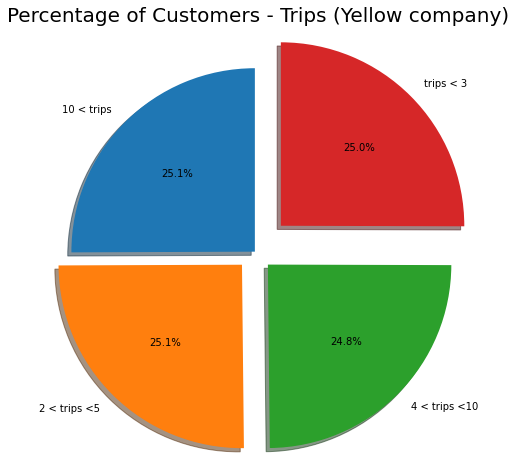

In [46]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = perc.iloc[:,0]
sizes = perc.iloc[:,1]
explode = (0, 0.1,.1,.2)  # only "explode" the 2nd slice (i.e. 'Hogs')
plt.figure(figsize=(8,8))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Percentage of Customers - Trips (Yellow company) ', fontsize=20)

plt.axis('equal')

<ipython-input-47-b1670602fcf2>:8: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',


(-1.13170428725553, 1.2398971099699472, -1.2079794661587486, 1.259267961579384)

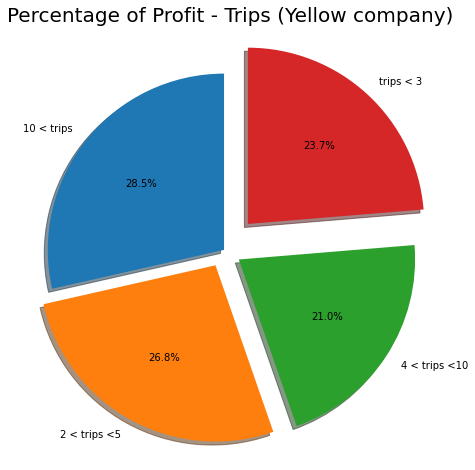

In [47]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = perc.iloc[:,0]
sizes = perc.iloc[:,3]
explode = (0, 0.1,.1,.2)  # only "explode" the 2nd slice (i.e. 'Hogs')
plt.figure(figsize=(8,8))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Percentage of Profit - Trips (Yellow company) ', fontsize=20)

plt.axis('equal')

## Hypothesis : Analyzing percentage of customers in different groups of number of trips.
    
### Almost one third of customers has more than 10 trips in the market creating 28.5% of Profit. But near 40% has less than 3 trips creating just 23.7% of the profit.

<ipython-input-48-53e9835c95fc>:8: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',


(-1.13170428725553, 1.2398971099699472, -1.2079794661587486, 1.259267961579384)

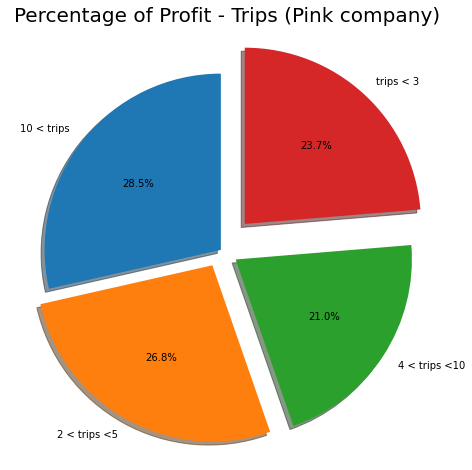

In [48]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = perc.iloc[:,0]
sizes = perc.iloc[:,3]
explode = (0, 0.1,.1,.2)  # only "explode" the 2nd slice (i.e. 'Hogs')
plt.figure(figsize=(8,8))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Percentage of Profit - Trips (Pink company) ', fontsize=20)

plt.axis('equal')

In [49]:
real_value = cusnum.groupby(['trips']).agg({'Age':'mean','Income (USD/Month)':'mean',\
                                           'Profit':'mean', 'Transaction ID': 'count'}).reset_index()
real_value

KeyError: 'trips'

In [50]:
real_value['Income (USD/Month)'] = pd.to_numeric(real_value['Income (USD/Month)'])
real_value['Profit'] = pd.to_numeric(real_value['Profit'])


#### Groupby trips - Line chart

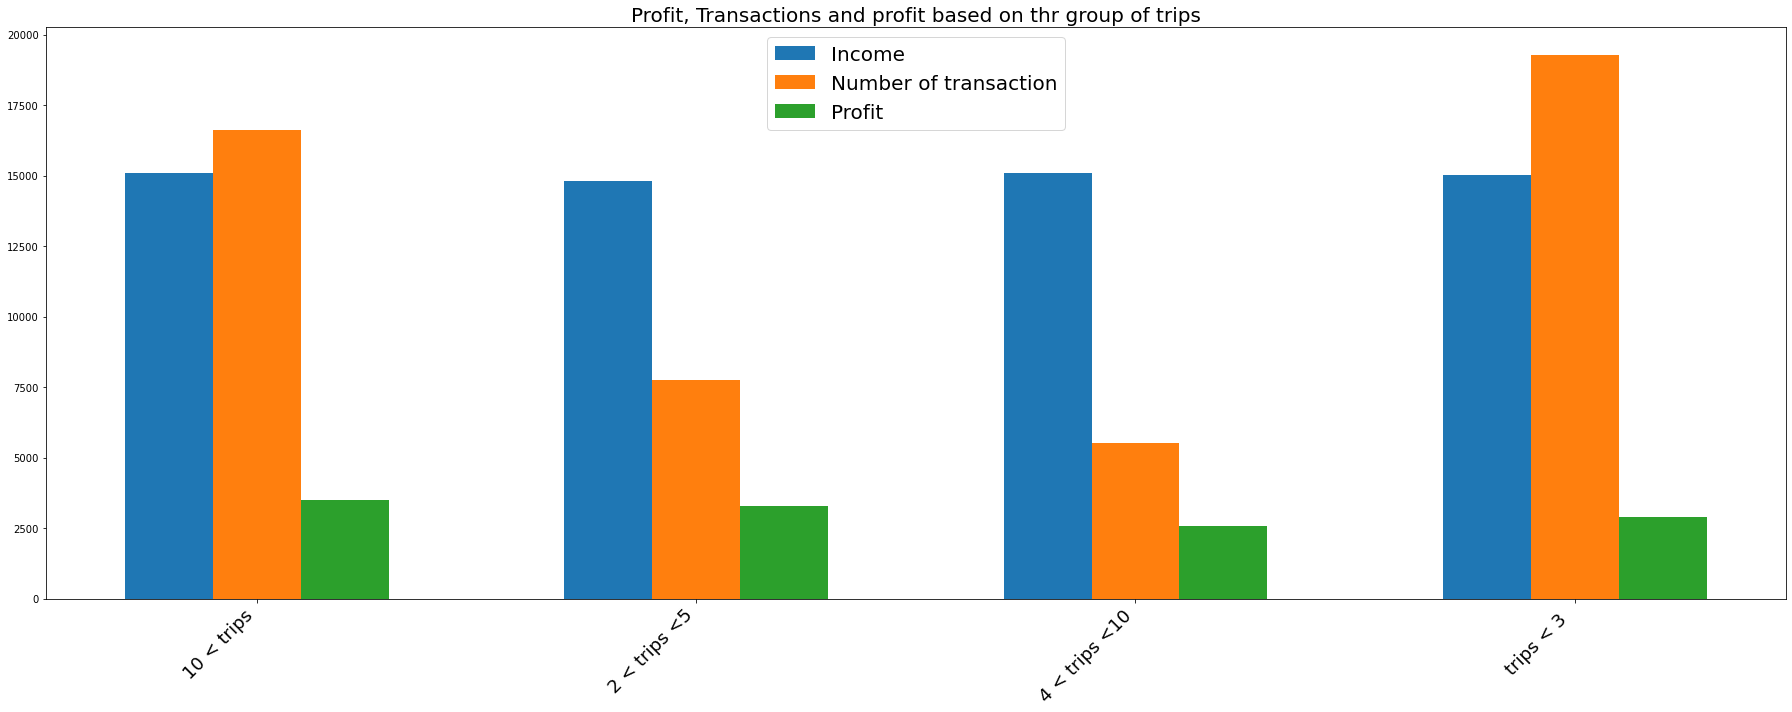

In [51]:

labels = real_value['trips']


x = np.arange(len(labels))  # the label locations
width = .2 # the width of the bars

fig, ax = plt.subplots(figsize=(25,10))
rects1 = ax.bar(x - width, real_value['Income (USD/Month)'],width,  label='Income')
rects2 = ax.bar(x , real_value['Transaction ID'],width, label='Number of transaction')
rects3 = ax.bar(x + width, real_value['Profit'],width, label='Profit')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('', fontsize=20)
ax.set_title('Profit, Transactions and profit based on thr group of trips', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize=20)
ax.ticklabel_format(axis="y",useOffset=False,style='plain', useLocale=True)
plt.xticks( rotation=45,fontsize=18, ha="right")

    
fig.tight_layout()

plt.show()

## Hypothesis 3: Analyzing relationship between profit created in different groups of number of trips
    
### Profit created in different groups of number of trips has no relationship or correlation with average income of customers and number of transaction.

## Seasonal analysis

### Groupby Date 

In [107]:
tcc_mean = tcc.groupby(['Date']).agg({'KM Travelled':'sum','Income (USD/Month)':'mean',\
                                           'Profit':'sum', 'Transaction ID': 'size'}).reset_index()

pink_mean = pink.groupby(['Date']).agg({'KM Travelled':'mean','Income (USD/Month)':'mean',\
                                           'Profit':'mean', 'Transaction ID': 'size'}).reset_index()

yellow_mean = yellow.groupby(['Date']).agg({'KM Travelled':'mean','Income (USD/Month)':'mean',\
                                           'Profit':'mean', 'Transaction ID': 'size'}).reset_index()


#### Seasonal poltting on total profit

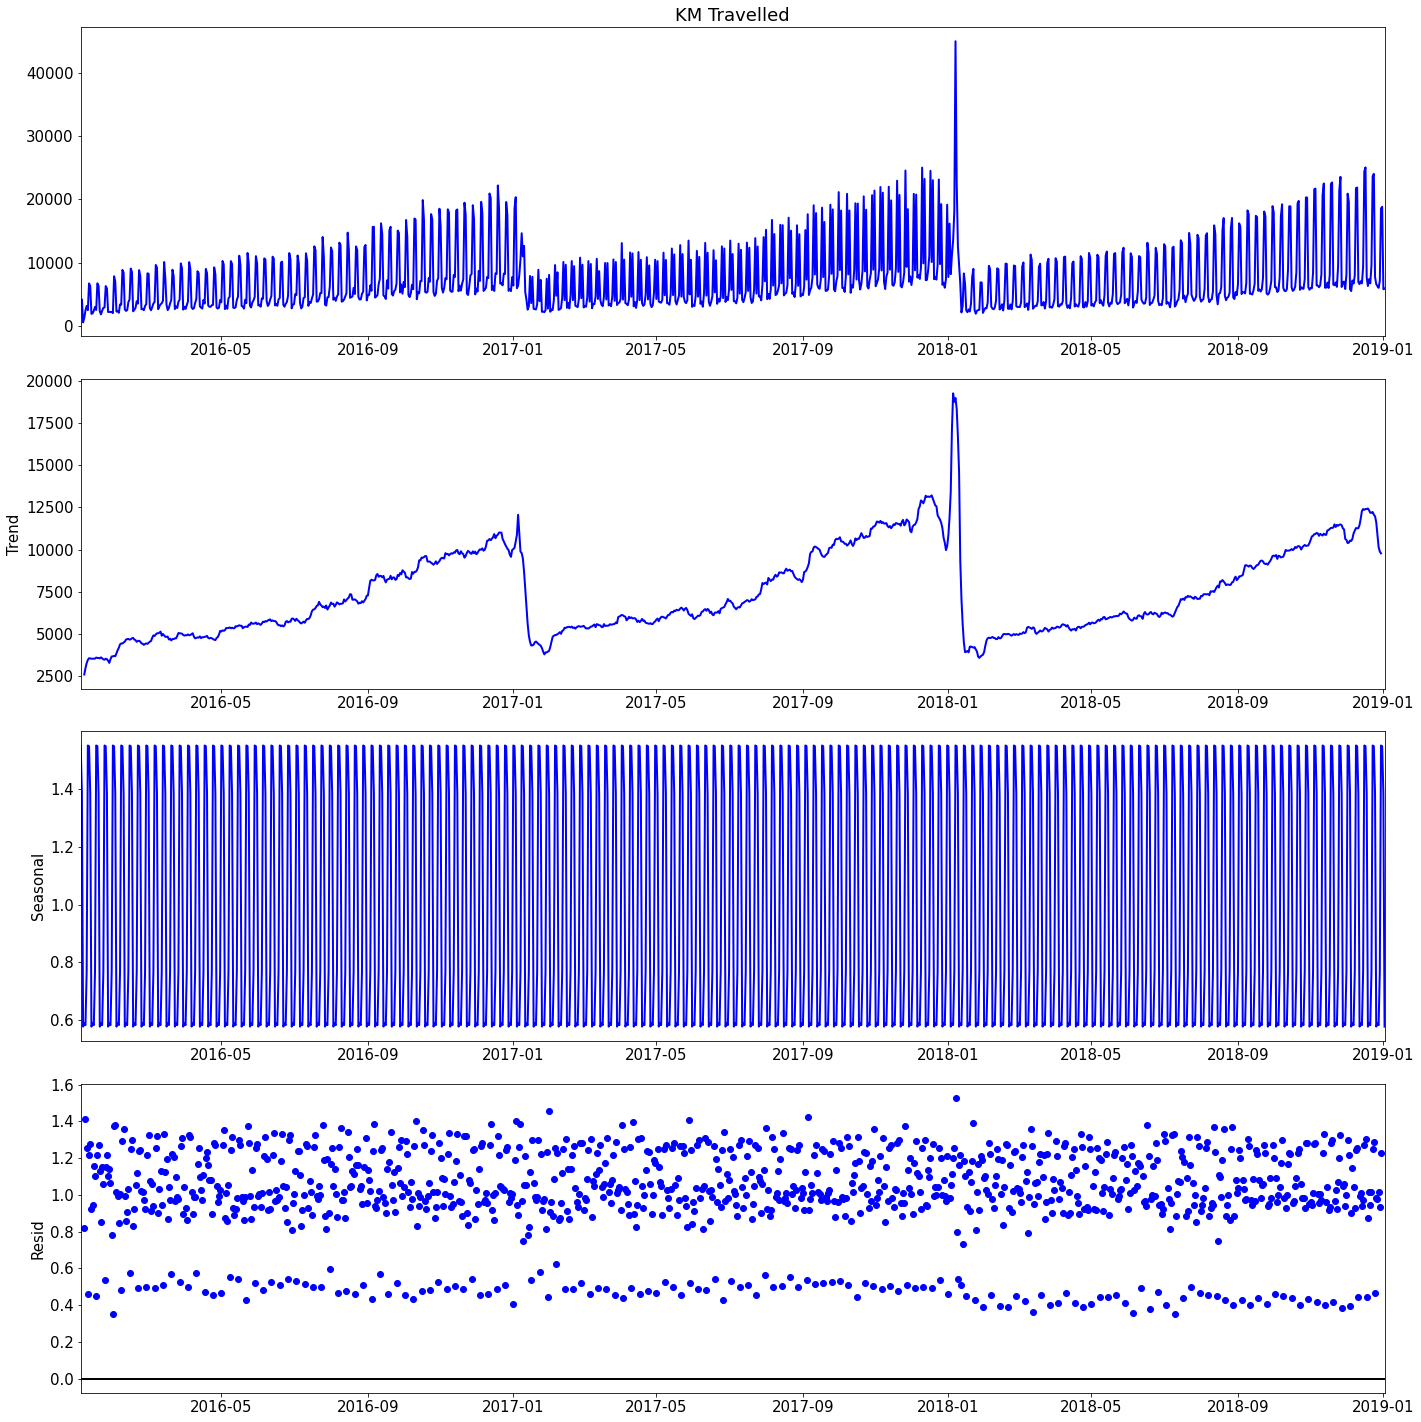

In [108]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Import Data

df = tcc_mean.loc[:,['Date','KM Travelled']]
df.set_index('Date', inplace=True)

# Decompose 
result = seasonal_decompose(df['KM Travelled'], model='multiplicative') # or additive

# Plot
plt.rcParams.update({'figure.figsize': (20,20), 'font.size': 15})
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.prop_cycle'] = plt.cycler(color='b')

# default cycle is: `['b', 'g', 'r', 'c', 'm', 'y', 'k']`
#matplotlib.rcParams.update({'font.size': 15})
result.plot()
#result.plot().suptitle('Time Series Decomposition of Distance Travelled')
plt.show()

## Hypothesis : Seasonality in Total Profit
    
### Profit has repeated a similar pattern across seasones of different years, but a noise has occurred before starting the second quarter of the second year.

In [68]:
tcc_sum = tcc.groupby(['Customer ID']).agg({'KM Travelled':'sum','Income (USD/Month)':'mean',\
                                           'Profit':'sum', 'Transaction ID': 'size'}).reset_index()

pink_sum = pink.groupby(['Customer ID']).agg({'KM Travelled':'sum','Income (USD/Month)':'mean',\
                                           'Profit':'sum', 'Transaction ID': 'size'}).reset_index()

yellow_sum = yellow.groupby(['Customer ID']).agg({'KM Travelled':'sum','Income (USD/Month)':'mean',\
                                           'Profit':'sum', 'Transaction ID': 'size'}).reset_index()


#### Seasonal poltting on total profit

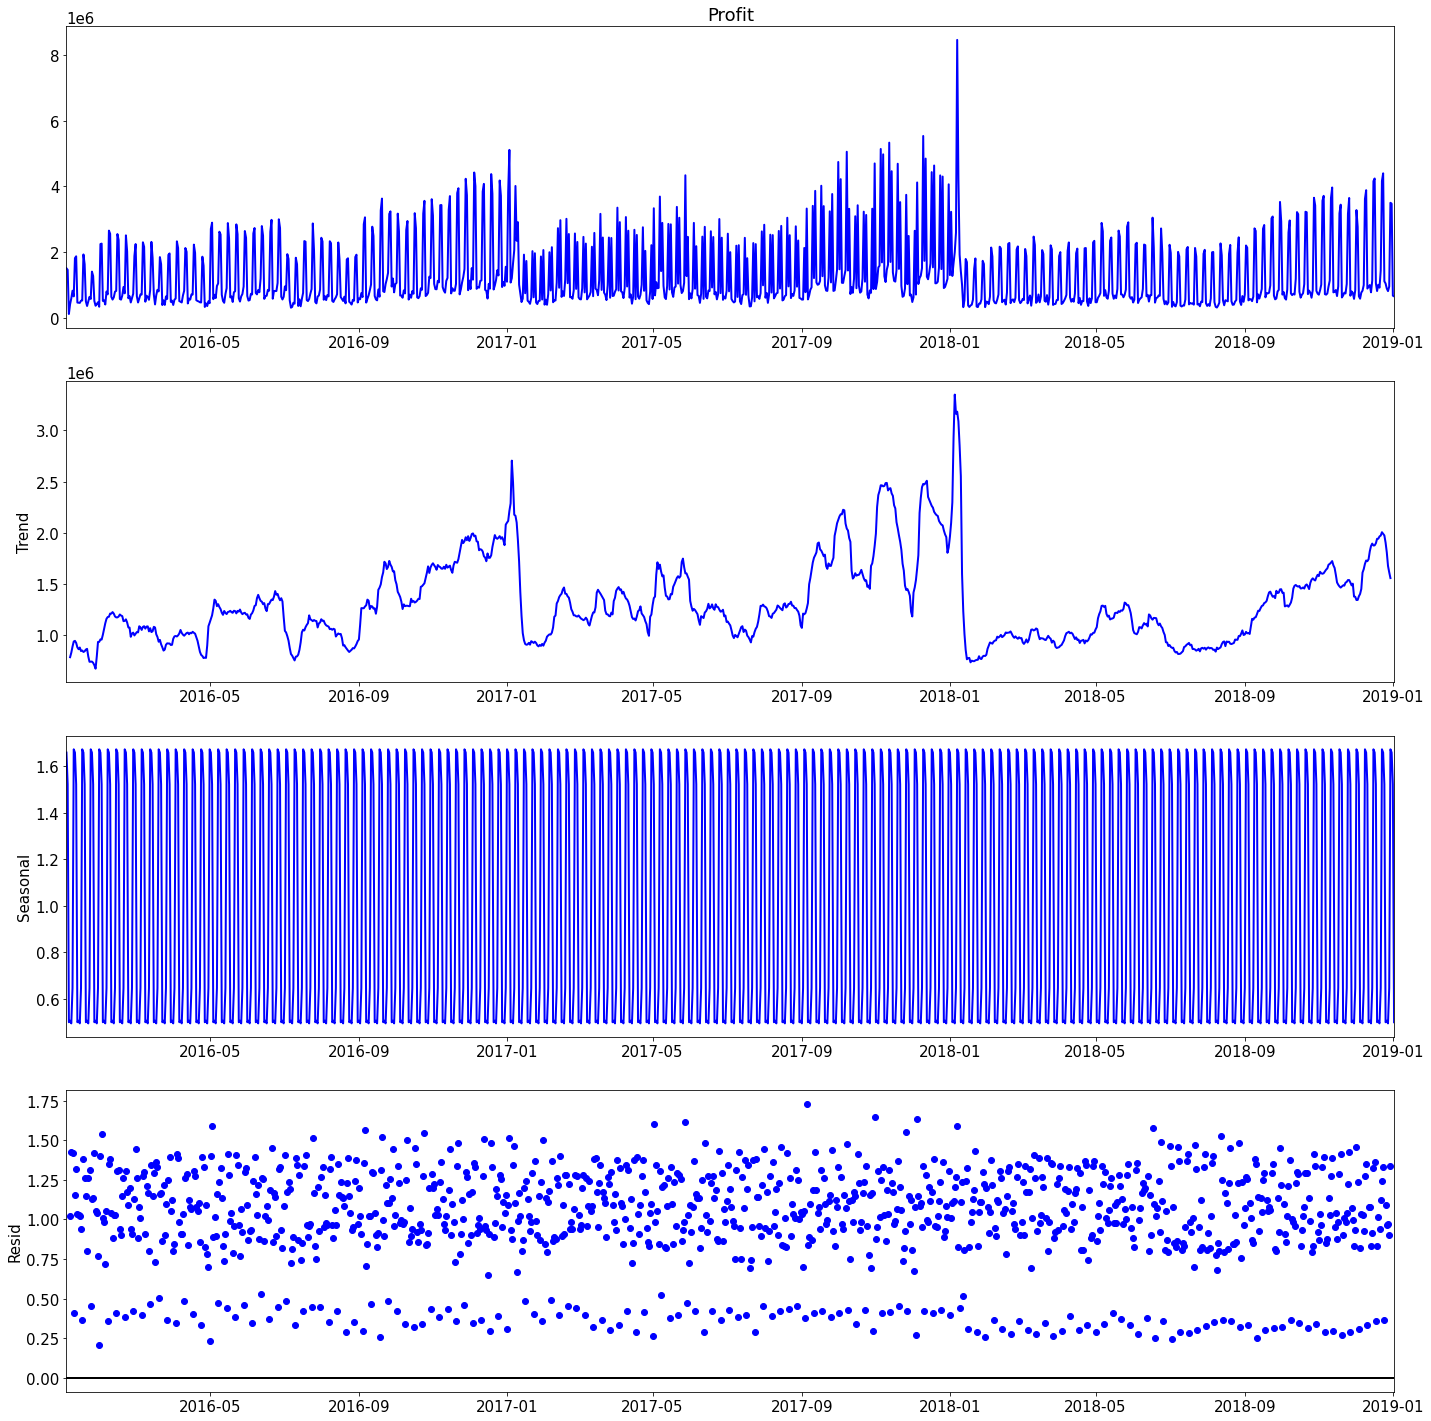

In [99]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Import Data

df = tcc_mean.loc[:,['Date','Profit']]
df.set_index('Date', inplace=True)

# Decompose 
result = seasonal_decompose(df['Profit'], model='multiplicative') # or additive

# Plot
plt.rcParams.update({'figure.figsize': (20,20), 'font.size': 15})
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.prop_cycle'] = plt.cycler(color='b')

# default cycle is: `['b', 'g', 'r', 'c', 'm', 'y', 'k']`
#matplotlib.rcParams.update({'font.size': 15})
result.plot()
#result.plot().suptitle('Time Series Decomposition of Distance Travelled')
plt.show()

## Hypothesis : Seasonality in Average Profit
    
### Profit average has weak uptrend and downtrend in the first half and second half of each year repectively.

#### Seasonal poltting on average profit

In [114]:
tcc_mean = tcc.groupby(['Date']).agg({'KM Travelled':'sum','Income (USD/Month)':'mean',\
                                           'Profit':'mean', 'Transaction ID': 'size'}).reset_index()

pink_mean = pink.groupby(['Date']).agg({'KM Travelled':'mean','Income (USD/Month)':'mean',\
                                           'Profit':'mean', 'Transaction ID': 'size'}).reset_index()

yellow_mean = yellow.groupby(['Date']).agg({'KM Travelled':'mean','Income (USD/Month)':'mean',\
                                           'Profit':'mean', 'Transaction ID': 'size'}).reset_index()


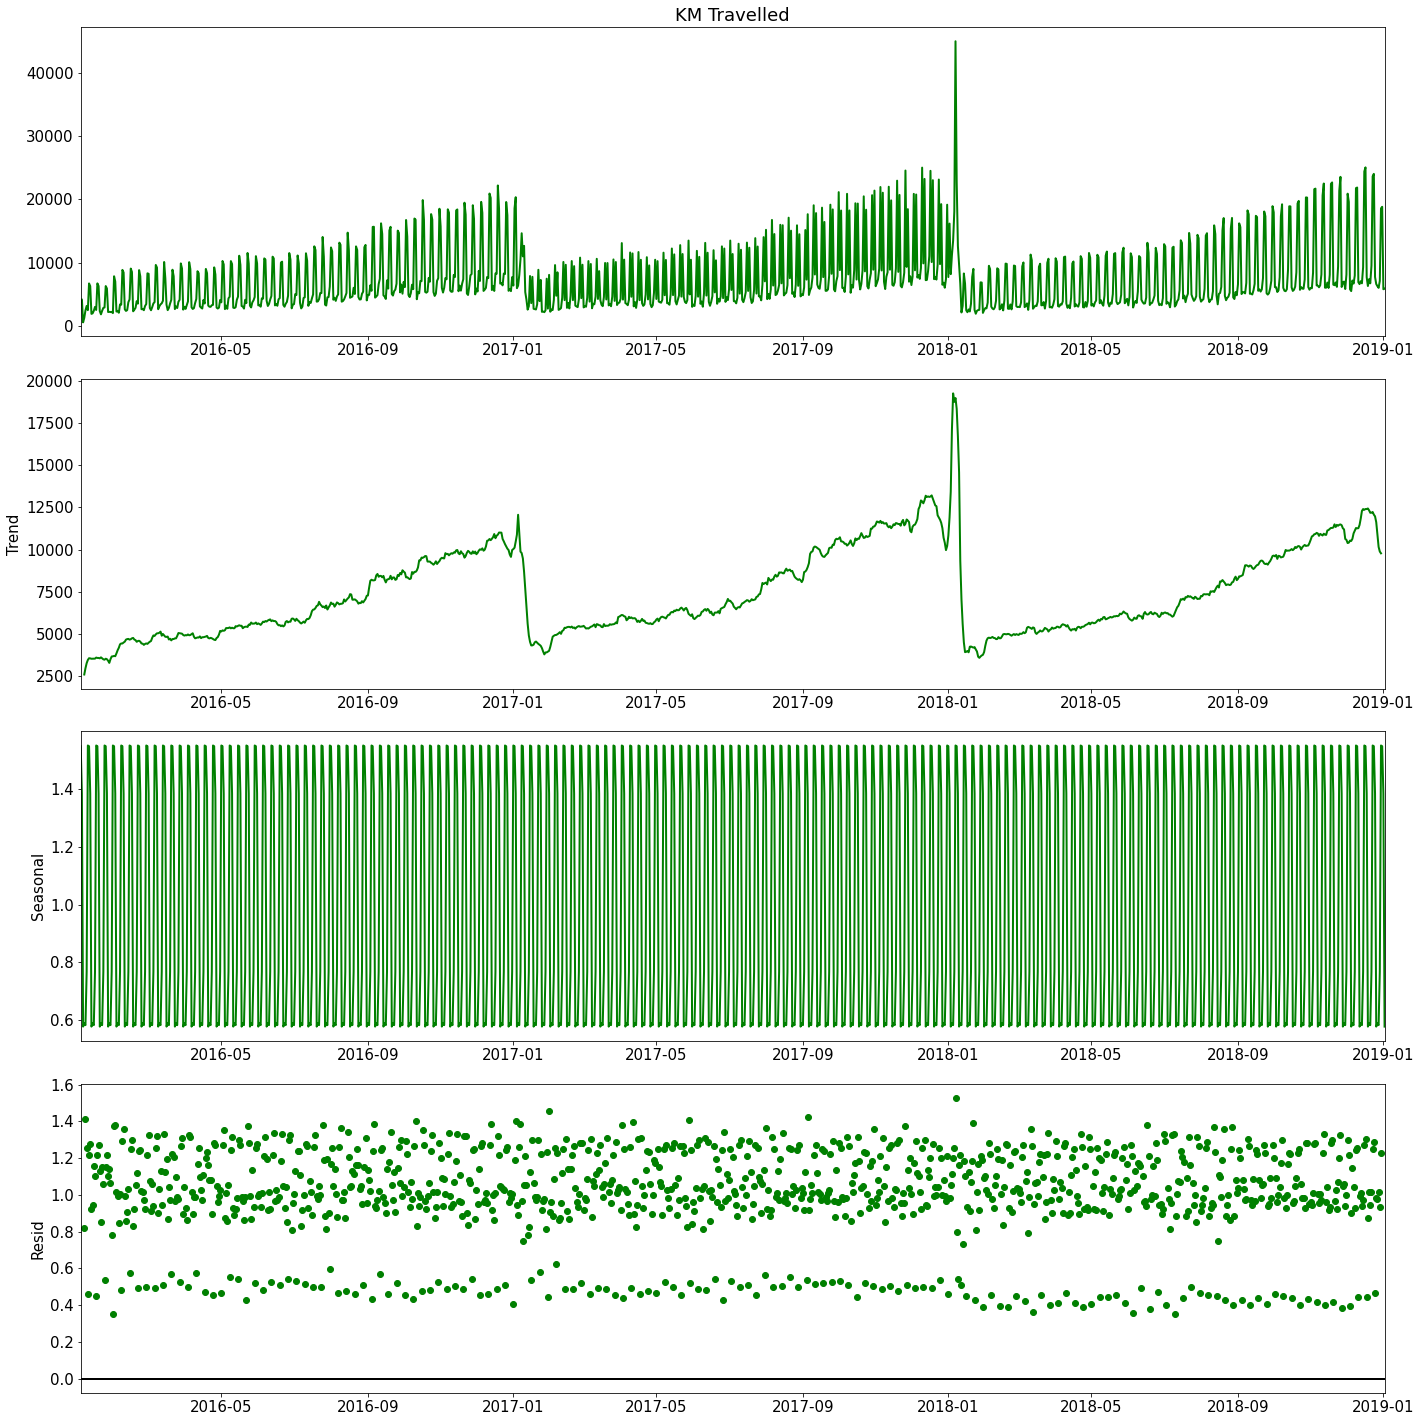

In [115]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Import Data

df = tcc_mean.loc[:,['Date','KM Travelled']]
df.set_index('Date', inplace=True)

# Decompose 
result = seasonal_decompose(df['KM Travelled'], model='multiplicative') # or additive

# Plot
plt.rcParams.update({'figure.figsize': (20,20), 'font.size': 15})
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.prop_cycle'] = plt.cycler(color='g')

# default cycle is: `['b', 'g', 'r', 'c', 'm', 'y', 'k']`
#matplotlib.rcParams.update({'font.size': 15})
result.plot()
#result.plot().suptitle('Time Series Decomposition of Distance Travelled')
plt.show()

## Hypothesis : Seasonality in the Distance Traveled
    
### There is a similar seasonal pattern between Profit and travel distance, but distance travel has a more visible trend across seasons.

In [111]:
tcc_mean = tcc.groupby(['Date']).agg({'KM Travelled':'mean','Income (USD/Month)':'mean',\
                                           'Profit':'mean', 'Transaction ID': 'size'}).reset_index()

pink_mean = pink.groupby(['Date']).agg({'KM Travelled':'mean','Income (USD/Month)':'mean',\
                                           'Profit':'mean', 'Transaction ID': 'size'}).reset_index()

yellow_mean = yellow.groupby(['Date']).agg({'KM Travelled':'mean','Income (USD/Month)':'mean',\
                                           'Profit':'mean', 'Transaction ID': 'size'}).reset_index()


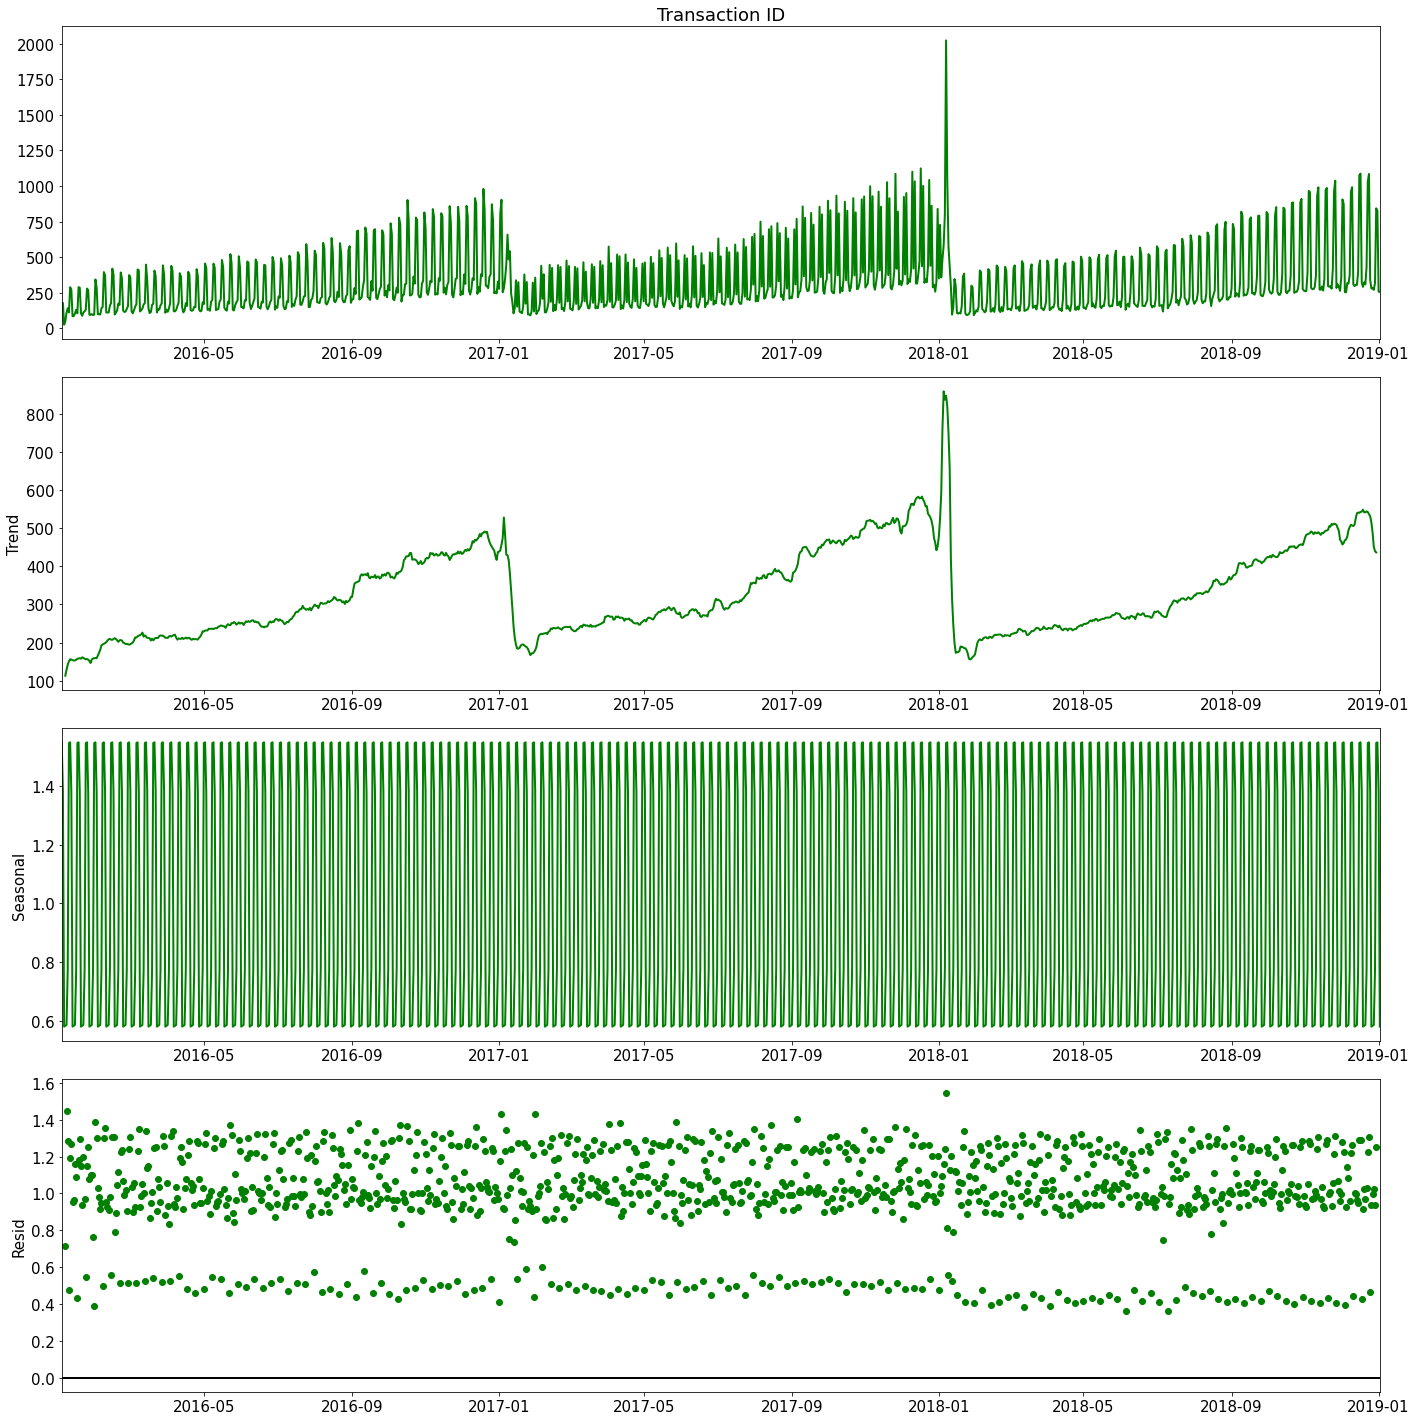

In [112]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Import Data

df = tcc_mean.loc[:,['Date','Transaction ID']]
df.set_index('Date', inplace=True)

# Decompose 
result = seasonal_decompose(df['Transaction ID'], model='multiplicative') # or additive

# Plot
plt.rcParams.update({'figure.figsize': (20,20), 'font.size': 15})
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.prop_cycle'] = plt.cycler(color='g')

# default cycle is: `['b', 'g', 'r', 'c', 'm', 'y', 'k']`
#matplotlib.rcParams.update({'font.size': 15})
result.plot()
#result.plot().suptitle('Time Series Decomposition of Distance Travelled')
plt.show()

## Hypothesis : Seasonality in the Number of Transaction
    
### There is a similar seasonal pattern between Profit and travel distance, but distance travel has a more visible trend across seasons.

### Distance travelled by dates 

In [75]:
pink_sum['KM Travelled'].describe()


count   32330.00
mean       59.11
std        53.58
min         1.90
25%        22.68
50%        39.96
75%        79.46
max       457.52
Name: KM Travelled, dtype: float64

In [76]:
yellow_sum[yellow_sum['KM Travelled']==1231.77]


,Customer ID,KM Travelled,Income (USD/Month),Profit,Transaction ID
125,126,1231.77,10637,508656.43,45


In [77]:
tcc[tcc['Customer ID']==126]


,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Gender,Age,Income (USD/Month),Date
21248,10021259,126,Card,42462.00,Yellow Cab,NEW YORK NY,37.83,1007.70,453.96,20947.98,Female,18,10637,2016-04-04
31929,10031940,126,Cash,42497.00,Pink Cab,NEW YORK NY,5.76,88.17,67.39,119.68,Female,18,10637,2016-05-09
55664,10055675,126,Cash,42572.00,Yellow Cab,NEW YORK NY,33.79,992.53,462.25,17918.26,Female,18,10637,2016-07-23
80600,10080611,126,Card,42639.00,Yellow Cab,NEW YORK NY,11.90,366.91,152.80,2547.96,Female,18,10637,2016-09-28
80686,10080697,126,Cash,42631.00,Yellow Cab,NEW YORK NY,5.85,199.86,70.90,754.40,Female,18,10637,2016-09-20
93808,10093819,126,Card,42666.00,Yellow Cab,NEW YORK NY,35.52,658.99,502.96,5542.07,Female,18,10637,2016-10-25
100934,10100945,126,Card,42678.00,Yellow Cab,NEW YORK NY,42.12,1038.37,550.93,20530.99,Female,18,10637,2016-11-06
107841,10107852,126,Cash,42692.00,Yellow Cab,NEW YORK NY,37.76,966.03,521.09,16801.01,Female,18,10637,2016-11-20
119023,10119034,126,Card,42715.00,Yellow Cab,NEW YORK NY,33.48,841.63,441.94,13381.76,Female,18,10637,2016-12-13
123106,10123117,126,Card,42715.00,Yellow Cab,NEW YORK NY,6.12,164.40,78.58,525.21,Female,18,10637,2016-12-13


In [78]:
def checkFunc(x):
    if x < 20:
        return 'Distance travelled < 20'
    elif x < 40:
        return '20 < Distance travelled < 40'
    elif x < 60:
        return '40 < Distance travelled < 60'
    elif x < 80:
        return '60 < Distance travelled < 80'
    elif x < 100:
        return '80 < Distance travelled < 100'
    else:
        return '100 < Distance travelled'

In [79]:
tcc_sum['travelled'] = tcc_sum['KM Travelled'].apply(lambda x: checkFunc(x))

pink_sum['travelled'] = pink_sum['KM Travelled'].apply(lambda x: checkFunc(x))

yellow_sum['travelled'] = yellow_sum['KM Travelled'].apply(lambda x: checkFunc(x))

tcc_sum


,Customer ID,KM Travelled,Income (USD/Month),Profit,Transaction ID,travelled
0,1,708.33,16359,243625.76,29,100 < Distance travelled
1,2,932.37,12069,350627.55,40,100 < Distance travelled
2,3,1037.41,12968,329011.47,46,100 < Distance travelled
3,4,646.92,13803,249762.82,26,100 < Distance travelled
4,5,732.08,9965,312032.02,31,100 < Distance travelled
...,...,...,...,...,...,...
49166,59996,61.72,16634,-679.02,4,60 < Distance travelled < 80
49167,59997,278.31,22352,16524.02,10,100 < Distance travelled
49168,59998,233.73,5678,21823.50,9,100 < Distance travelled
49169,59999,163.63,24577,7854.71,8,100 < Distance travelled


In [80]:
tcc_sum_n = tcc_sum.groupby(['travelled']).agg({'KM Travelled':'mean','Income (USD/Month)':'mean',\
                                           'Profit':'sum', 'Transaction ID': 'size'}).reset_index()

pink_sum_n = pink_sum.groupby(['travelled']).agg({'KM Travelled':'mean','Income (USD/Month)':'mean',\
                                           'Profit':'sum', 'Transaction ID': 'size'}).reset_index()

yellow_sum_n = yellow_sum.groupby(['travelled']).agg({'KM Travelled':'mean','Income (USD/Month)':'mean',\
                                           'Profit':'sum', 'Transaction ID': 'size'}).reset_index()


In [81]:
tcc_sum_n

,travelled,KM Travelled,Income (USD/Month),Profit,Transaction ID
0,100 < Distance travelled,355.47,15042.67,1293026379.74,19703
1,20 < Distance travelled < 40,30.52,14954.28,30077473.39,8460
2,40 < Distance travelled < 60,48.80,15061.76,38488679.73,5711
3,60 < Distance travelled < 80,69.55,14784.95,40300627.25,4001
4,80 < Distance travelled < 100,89.16,14865.56,33988827.57,2551
5,Distance travelled < 20,7.32,15133.25,3481739.83,8745


### Groupby distance travelled - Bar chart

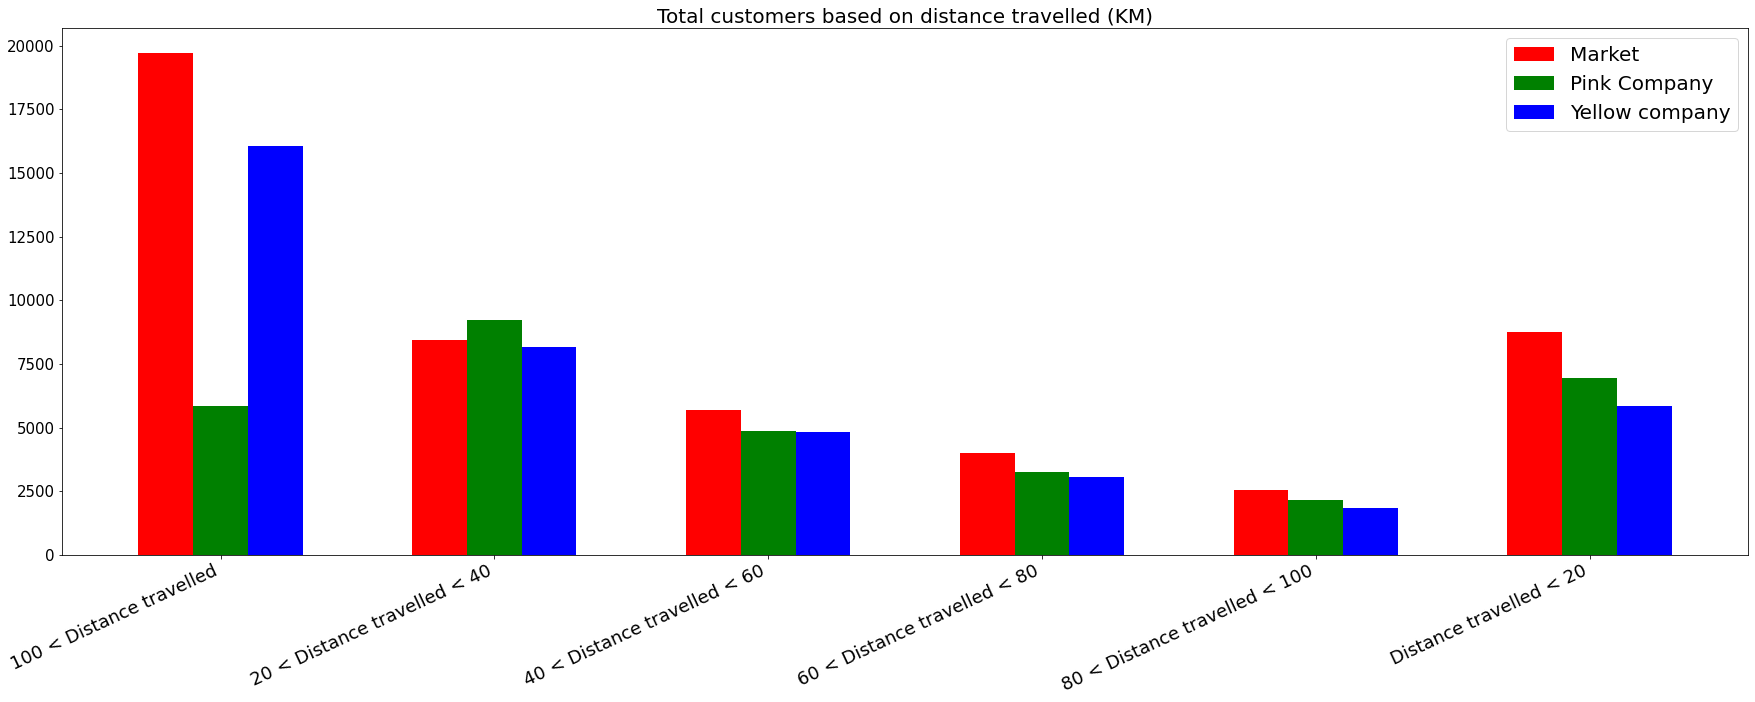

In [85]:

labels = tcc_sum_n['travelled']


x = np.arange(len(labels))  # the label locations
width = .2 # the width of the bars

fig, ax = plt.subplots(figsize=(25,10))
rects1 = ax.bar(x - width, tcc_sum_n['Transaction ID'],width,  label='Market', color='r')
rects2 = ax.bar(x , pink_sum_n['Transaction ID'],width, label='Pink Company')
rects3 = ax.bar(x + width, yellow_sum_n['Transaction ID'],width, label='Yellow company', color='b')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('', fontsize=20)
ax.set_title('Total customers based on distance travelled (KM)', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize=20)
ax.ticklabel_format(axis="y", useOffset=False, style='plain', useLocale=True)
plt.xticks( rotation=25,fontsize=18, ha="right")
    
fig.tight_layout()

plt.show()

## Hypothesis: Relationship between distance Travelled and The Number of Customers
    
### Yellow company has more customers with total distance travelled greater than 100 kilometers than Pink company. ( Note that some customers are for both Pink and Yellow companies)

### Groupby distance travelled - Bar chart

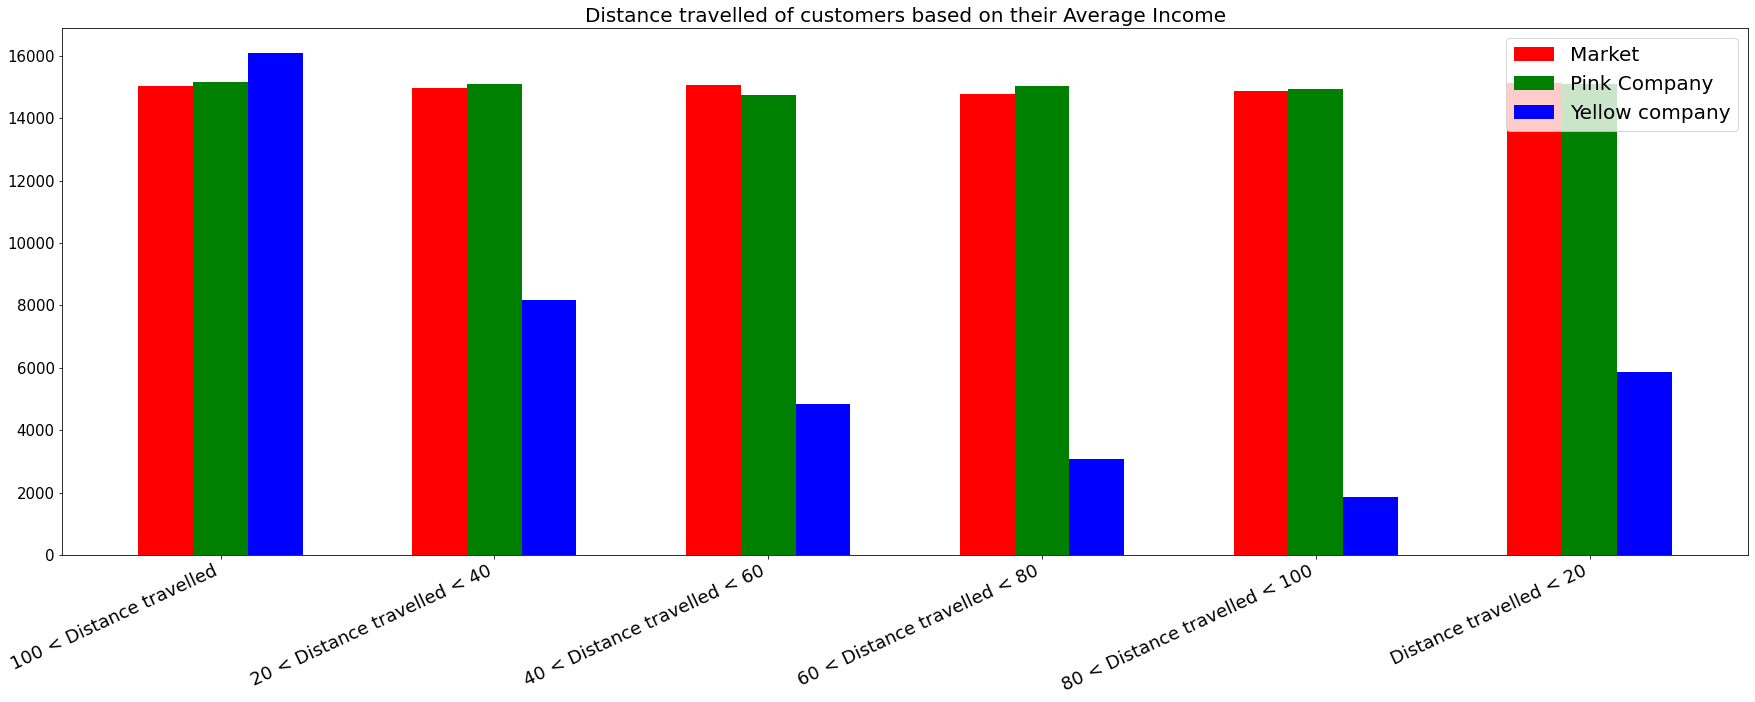

In [117]:

labels = tcc_sum_n['travelled']


x = np.arange(len(labels))  # the label locations
width = .2 # the width of the bars

fig, ax = plt.subplots(figsize=(25,10))
rects1 = ax.bar(x - width, tcc_sum_n['Income (USD/Month)'],width,  label='Market', color='r')
rects2 = ax.bar(x , pink_sum_n['Income (USD/Month)'],width, label='Pink Company')
rects3 = ax.bar(x + width, yellow_sum_n['Transaction ID'],width, label='Yellow company', color='b')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('', fontsize=20)
ax.set_title('Distance travelled of customers based on their Average Income', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize=20)
ax.ticklabel_format(axis="y",useOffset=False,style='plain', useLocale=True)
plt.xticks( rotation=25,fontsize=18, ha="right")

    
fig.tight_layout()

plt.show()

## Hypothesis: Distance Travelled and Average Income of Customers
    
### Obviously ther is no relationship between the distance travelled by the customers and their average income.

In [100]:

df = tcc_mean.loc[:,['Date','Transaction ID']]
df.set_index('Date', inplace=True)
df=df.astype(float)
df

,Transaction ID
Date,
2016-01-04,181.00
2016-01-05,178.00
2016-01-06,25.00
2016-01-07,47.00
2016-01-08,109.00
...,...
2018-12-29,318.00
2018-12-30,843.00
2018-12-31,825.00


In [101]:
for col in df.loc[:, :]:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0) # coercing any errors to NaN

In [102]:
type(df.iloc[4,0])

numpy.float64

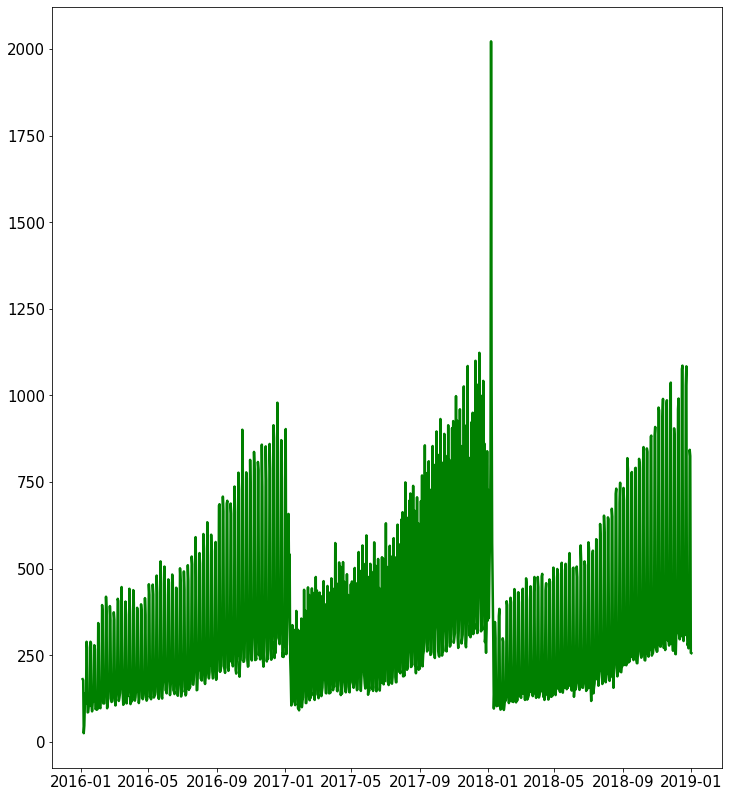

In [95]:

fig, ax = plt.subplots(1, 1, figsize=(12, 14))

# Ensure that the axis ticks only show up on the bottom and left of the plot.
# Ticks on the right and top of the plot are generally unnecessary.
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

for column in df:
    # Plot each line separately with its own color.
   # column_rec_name = column.replace('\n', '_').replace(' ', '_')

    line, = ax.plot(df.index, df["Transaction ID"],  lw=2.5)
    
plt.show()

